# test 1

In [1]:
from __future__ import division

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data = pd.read_table('water.txt', sep='\t')

In [5]:
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


In [6]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [7]:
data_s = data[data['location'] == 'South']
data_n = data[data['location'] == 'North']

In [8]:
data_n.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [9]:
data_v = data
mean = data_v['mortality'].mean()
std = data_v['mortality'].std(ddof=1) / np.sqrt(len(data_v['mortality']))
interval_t = _tconfint_generic(mean, 
                             std,
                             len(data_v['mortality']) - 1,
                             0.05, 'two-sided')
print round(interval_t[0], 4)
interval_t

1476.0833


(1476.0833413552848, 1572.2117406119285)

In [10]:
data_v = data_s
mean = data_v['mortality'].mean()
std = data_v['mortality'].std(ddof=1) / np.sqrt(len(data_v['mortality']))
interval_t = _tconfint_generic(mean, 
                             std,
                             len(data_v['mortality']) - 1,
                             0.05, 'two-sided')
print round(interval_t[1], 4)
interval_t

1433.4636


(1320.1517462936238, 1433.463638321761)

In [11]:
data_v = data_n
mean = data_v['mortality'].mean()
std = data_v['mortality'].std(ddof=1) / np.sqrt(len(data_v['mortality']))
interval_t = _tconfint_generic(mean, 
                             std,
                             len(data_v['mortality']) - 1,
                             0.05, 'two-sided')
print round(interval_t[0], 4)
interval_t

1586.5605


(1586.5605251961385, 1680.6394748038613)

In [12]:
data_v = data_n
mean = data_v['hardness'].mean()
std = data_v['hardness'].std(ddof=1) / np.sqrt(len(data_v['hardness']))
interval_t = _tconfint_generic(mean, 
                             std,
                             len(data_v['hardness']) - 1,
                             0.05, 'two-sided')
print round(interval_t[0], 4)
interval_t

21.4225


(21.422487285724259, 39.377512714275738)

In [13]:
data_v = data_s
mean = data_v['hardness'].mean()
std = data_v['hardness'].std(ddof=1) / np.sqrt(len(data_v['hardness']))
interval_t = _tconfint_generic(mean, 
                             std,
                             len(data_v['hardness']) - 1,
                             0.05, 'two-sided')
print round(interval_t[0], 4)
interval_t

53.4672


(53.467198692036106, 86.071262846425441)

$X_{1-0.5/2}$ * $sigma$ / $sqrt(n)$ = 0.1 ==> n = ($X_{1-0.5/2}$ / 0.1)$^2$, точнее - ближайшее сверху

In [14]:
 from scipy.stats import norm

In [15]:
from scipy import stats

In [16]:
np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)

385.0

In [17]:
np.ceil(3.7)

4.0

In [18]:
(stats.norm.ppf(1-0.05/2) / 0.1)**2

384.14588206941244

In [19]:
stats.norm.ppf((1-0.05/2))

1.959963984540054

# test2

In [20]:
from statsmodels.stats.proportion import proportion_confint

In [50]:
count = 1
nobs = 50
maya_interval_95 = proportion_confint(count, nobs, method='normal')
round(maya_interval_95[0], 4)

-0.0188

In [44]:
count = 1
nobs = 50
maya_interval_95 = proportion_confint(count, nobs, method='wilson')
round(maya_interval_95[0], 4)

0.0035

In [24]:
np.ceil((stats.norm.ppf(1-0.05/2) / 0.01)**2 * p * (1 - p))

753.0

In [25]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

753.0

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['std', 'ceil', 'norm', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


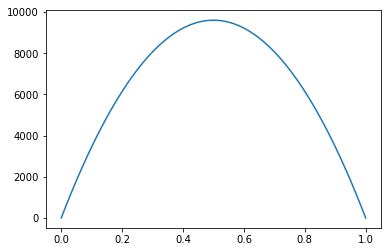

In [27]:
P = linspace(0, 1, 100)
pylab.plot(P, [np.ceil((stats.norm.ppf(1-0.05/2) / 0.01)**2 * p * (1 - p)) for p in P])

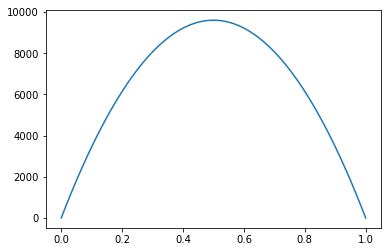

In [52]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
P = linspace(0, 1, 100)
pylab.plot(P, [ceil(samplesize_confint_proportion(p, 0.01, method='normal')) for p in P])

In [28]:
p = 0.5
np.ceil((stats.norm.ppf(1-0.05/2) / 0.01)**2 * p * (1 - p))

9604.0

In [53]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604.0